Problem 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


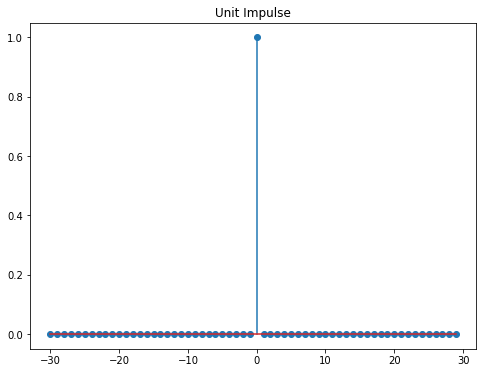

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


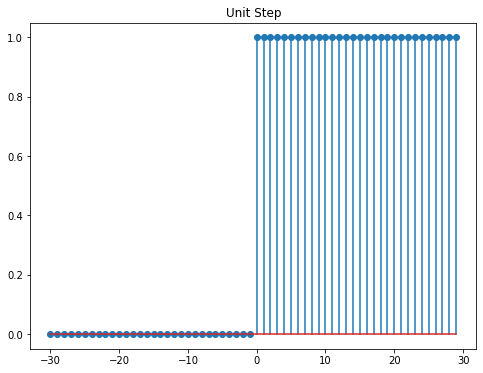

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


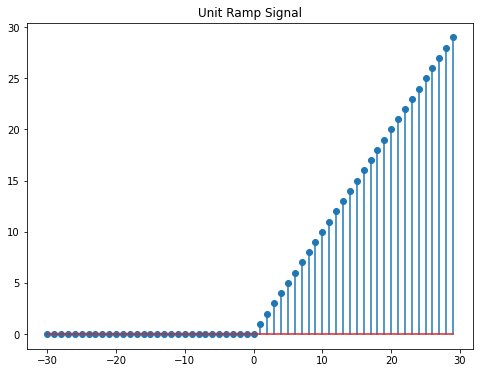

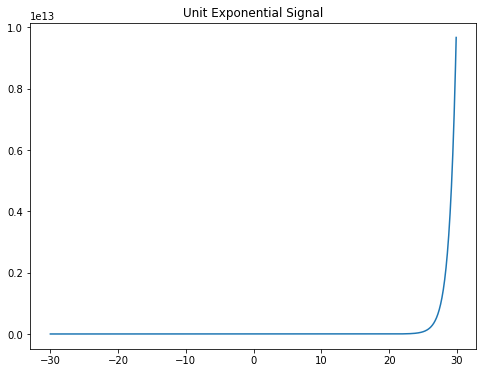

In [41]:
import numpy as np
import matplotlib.pyplot as plt

sig = np.arange(-30, 30, 1)
y = []
for i in sig:
    if i == 0 :
        y.append(1)
    else :
        y.append(0)
plt.figure(figsize = [8,6])
plt.title("Unit Impulse")
plt.stem(sig, y)
plt.show()

sig = np.arange(-30, 30, 1)
y = []
for i in sig:
    if i >= 0 :
        y.append(1)
    else :
        y.append(0)
plt.figure(figsize = [8,6])
plt.title("Unit Step")
plt.stem(sig, y)
plt.show()

sig = np.arange(-30, 30, 1)
y = []
for i in sig:
    if i > 0 :
        y.append(i)
    else :
        y.append(0)
plt.figure(figsize = [8,6])
plt.title("Unit Ramp Signal")
plt.stem(sig, y)
plt.show()

sig = np.arange(-30, 30, 0.1)
y = []
for i in sig:
    y.append(np.exp(i))
plt.figure(figsize = [8,6])
plt.title("Unit Exponential Signal")
plt.plot(sig, y)
plt.show()





Problem 2

In [27]:
import random
p_len = random.randint(3,10)
q_len = random.randint(3,10)

p = random.sample(range(1, 10), p_len)
q = random.sample(range(1, 10), q_len)


y = [0 for i in range(len(p) + len(q) - 1)]

print("p = ",p," q = ",q," y = ",y)

for i in range(len(p)):
  for j in range(len(q)):
    y[i + j] += p[i] * q[j]

print("Linear convolution using np: = ", y)
print("Linear convolution in function: = ", y)

p =  [1, 9, 2, 6, 7, 3]  q =  [9, 1, 4, 3, 7, 2, 8, 6, 5]  y =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Linear convolution using np: =  [9, 82, 31, 95, 111, 129, 89, 157, 145, 140, 108, 96, 53, 15]
Linear convolution in function: =  [9, 82, 31, 95, 111, 129, 89, 157, 145, 140, 108, 96, 53, 15]


Problem 3

In [26]:
p = [1,3,1,1];
q = [1,2,2,1];

p_len = len(p)
q_len = len(q)

conv_len = p_len+q_len-1

y = np.zeros(conv_len)

for i in range(q_len):
    q[q_len-i-1] = q[i]

m = conv_len-p_len
n = conv_len-q_len
p = np.pad(p,(0,m),'constant')
q = np.pad(q,(0,n),'constant')

for n in range(conv_len):
    for j in range(conv_len):
        if n >= j:
             y[n] = y[n]+p[n-j]*q[j]
         

print('Cross-Correlation y =',y)

Cross-Correlation y = [ 1.  5.  9. 10.  7.  3.  1.]


Problem 4

In [42]:
x_len = random.randint(3,10)
x = random.sample(range(1, 20), x_len)

y_len = x_len
y = x

autoCor = [0 for i in range(len(x) + len(y) - 1)]

fy = np.flip(y)
for i in range(len(x)):
  for j in range(len(y)):
    autoCor[i + j] += x[i] * fy[j]

print("Cross Correlation (function): ",autoCor)
print("np.correlate() = ", np.correlate(x, y, 'full'))

Cross Correlation (function):  [224, 256, 326, 597, 326, 256, 224]
np.correlate() =  [224 256 326 597 326 256 224]


Problem 5


In [34]:
def DFT(x):
  N = len(x)
  X = []
  for k in range(N):
    ans = 0
    for n in range(N):
      ans += x[n] * np.exp((-2j * np.pi * k * n) / N)
    X.append(ans)
  return X

import random
x_len = random.randint(3,10)
x = random.sample(range(1, 20), x_len) 
print("x = ", x)
dft = DFT(x)
print("DFT of x = ", dft)

print("Real part after rounding ", end = ':')
for i in range(len(dft)):
  print( round(dft[i].real), end = ' ' )

x =  [14, 1, 18, 7, 17, 19, 5]
DFT of x =  [(81+0j), (-12.115588574889292+8.441091233229525j), (-5.7072184715177885-4.352486915070567j), (26.32280704640711+10.702982595820462j), (26.32280704640708-10.70298259582043j), (-5.707218471517765+4.352486915070554j), (-12.115588574889207-8.441091233229562j)]
Real part after rounding :81 -12 -6 26 26 -6 -12 

Problem 6

In [33]:
def IDFT(X):
  N = len(X)
  x = []
  for n in range(N):
    ans = 0
    for k in range(N):
      ans += X[k] * np.exp((2j * np.pi * k * n) / N)
    ans /= N
    x.append(ans)
  return x

idft = IDFT(dft)
print("Idft = ", idft)

ara = [round(i.real) for i in idft]
print("Real part after rounding : ", ara)

Idft =  [(9.999999999999998-1.0658141036401503e-14j), (14.999999999999995+5.4771002548174384e-15j), (17.999999999999996-1.7763568394002505e-15j), (5.999999999999993+1.1250259982868252e-14j), (2.0000000000000053+2.9605947323337506e-16j), (11.000000000000002-1.1842378929335002e-15j)]
Real part after rounding :  [10, 15, 18, 6, 2, 11]


In [43]:
#cross_checking
dft_np = np.fft.fft(x)
idft_np = np.fft.ifft(dftUsingNumpy)

flag = True
for i in range(len(x)):
  if x[i]==ara[i] and x[i]==idft_np[i]:
    continue
  else:
    print('Not matched !')
    flag = False
    break
if flag:
  print('Matched.  Checked using numpy library .fft.fft() & numpy.fft.ifft(). ')

Not matched !


Problem 7

In [44]:
import random
x_len = random.randint(3,10)
x = random.sample(range(1, 20), x_len)  

h_len = random.randint(3,10)
h = random.sample(range(1, 20), h_len)  

print("Linear convolution of x and h = ",np.convolve(h, x) )


padding = len(h) + len(x) - 1
while len(h) != padding:
  h.append(0)
while len(x) != padding:
  x.append(0)

H = DFT(h) 
X = DFT(x)
print("DFT of x = ", X, ", DFT of h = ", H)

ans = [0 for i in range(len(X))]

for i in range(len(X)):
  ans[i] = X[i] * H[i]

idft_ans = IDFT(ans)

print("After IDFT: ",idft_ans)

print("\n The real part of idft after rounding : ")
for i in idft_ans:
  print( round(i.real) , end = ' ')



Linear convolution of x and h =  [ 34 327 354 234 488 633 598 617 494 275 202  84]
DFT of x =  [(62+0j), (15.89230484541327-43.11473670974872j), (-4.499999999999999-16.454482671904334j), (-4.999999999999992-21j), (-20.499999999999993-4.330127018922203j), (-4.892304845413259+7.114736709748719j), -1.1087386396739663e-14j, (-4.892304845413247-7.114736709748727j), (-20.500000000000014+4.3301270189221714j), (-4.999999999999994+21j), (-4.500000000000006+16.454482671904312j), (15.892304845413198+43.1147367097487j)] , DFT of h =  [(70+0j), (-6.928203230275505-32.32050807568877j), (15.999999999999993+15.588457268119893j), (15.00000000000001-3.000000000000001j), (22.000000000000014-1.732050807568878j), (6.928203230275521+2.3205080756887386j), (28-1.0048293559374178e-14j), (6.928203230275521-2.320508075688791j), (21.99999999999998+1.7320508075688779j), (15.000000000000014+2.9999999999999956j), (15.999999999999982-15.588457268119864j), (-6.928203230275589+32.32050807568866j)]
After IDFT:  [(34.000

Problem 8



In [36]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def FFT(x):

  x = np.asarray(x, dtype=float)
  N = x.shape[0]
  if N % 2 > 0:
    raise ValueError("size of x must be a power of 2")
  elif N <= 32:  # this cutoff should be optimized
    return DFT_slow(x)
  else:
    X_even = FFT(x[::2])
    X_odd = FFT(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([X_even + factor[:N // 2] * X_odd,
                            X_even + factor[N // 2:] * X_odd])


x = np.random.random(1024)

print(x)
np.allclose(FFT(x), np.fft.fft(x))

[0.27983223 0.06519894 0.26314773 ... 0.19506542 0.61367306 0.57591934]


True

Problem 9

In [45]:
x = [1, 2, 3, 4, 5, 6, 7, 8]

def rad2(x_full):
  N = len(x_full)
  if N == 2:
    
    dft = DFT(x_full) 
    return dft
  x_even = []
  x_odd = [] 
  for i in range(len(x_full)):
    if i % 2 == 0:
      x_even.append(x_full[i])
    else:
      x_odd.append(x_full[i])
  X_even = rad2(x_even)
  X_odd = rad2(x_odd)
  X = [0 for i in range(N)] 

  for k in range(int(N / 2)):
    term = np.exp((-2j * np.pi * k) / N) * X_odd[k]
    X[k] =  X_even[k] + term
    X[k+ N//2] = X_even[k] - term
  return X

ans = rad2(x)
print(ans)

[(36+0j), (-4.000000000000002+9.65685424949238j), (-4+4j), (-4.000000000000001+1.6568542494923788j), (-4+0j), (-3.9999999999999996-1.6568542494923801j), (-3.9999999999999996-4j), (-3.9999999999999973-9.65685424949238j)]
